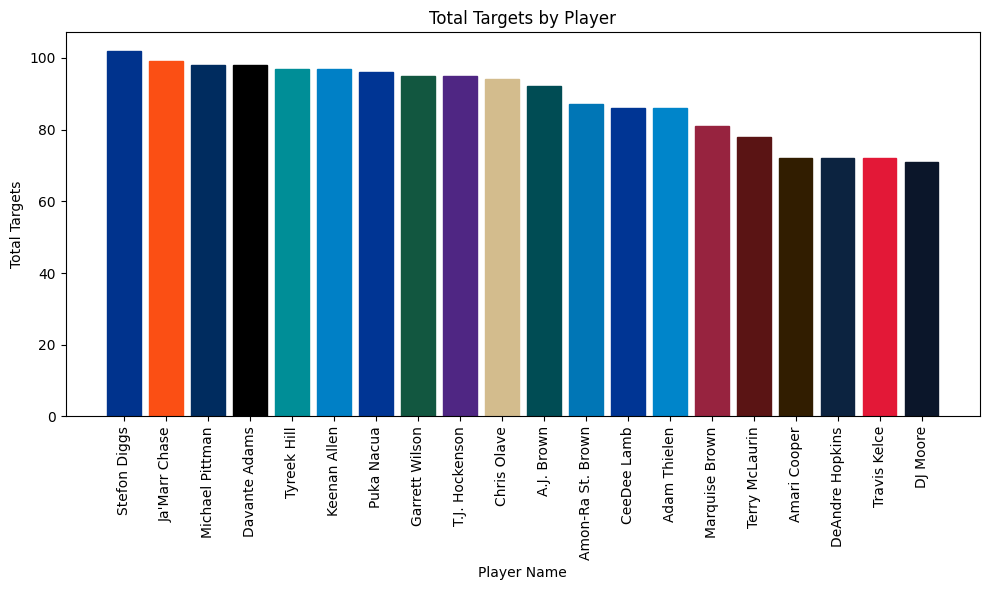

In [7]:
import dotenv
import os
from sqlalchemy import create_engine, func, text
from sqlalchemy.orm import sessionmaker
import matplotlib.pyplot as plt
from models import ReceivingGameLog, Game, Player

# Load environment variables from the .env file
dotenv.load_dotenv()

DB_USERNAME = os.environ['DB_USERNAME']
DB_PASSWORD = os.environ['DB_PASSWORD']
DB_HOST = os.environ['DB_HOST']
DB_PORT = os.environ['DB_PORT']
DB_NAME = os.environ['DB_NAME']

DB_URL = f"mysql+pymysql://{DB_USERNAME}:{DB_PASSWORD}@{DB_HOST}:{DB_PORT}/{DB_NAME}"

# Create the SQLAlchemy engine
engine = create_engine(DB_URL)

# Create a session
Session = sessionmaker(bind=engine)
session = Session()

query = text("SELECT p.player_name, SUM(rgl.targets) AS total_targets, t.primary_color \
    FROM players p JOIN receiving_game_logs rgl ON p.player_id = rgl.player_id \
    JOIN teams t ON p.team_id = t.team_id GROUP BY p.player_id ORDER BY total_targets DESC \
    LIMIT 20;")

# Execute the raw query
results = session.execute(query).fetchall()

# Extract data for the plot
player_names = [result.player_name for result in results]
total_targets = [result.total_targets for result in results]
team_colors = [result.primary_color for result in results]

# Create a bar plot
plt.figure(figsize=(10, 6))
bars = plt.bar(player_names, total_targets)
for bar, team_color in zip(bars, team_colors):
    bar.set_color(team_color)
plt.xlabel('Player Name')
plt.ylabel('Total Targets')
plt.title('Total Targets by Player')
plt.xticks(rotation=90)
plt.tight_layout()

# Display the plot
plt.show()

# Close the session
session.close()